<a href="https://colab.research.google.com/github/MiguelZN/KerasDeepLearningWithPython/blob/master/KerasTest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1. 0. 0. ... 0. 1. 0.]
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.5178 - binary_accuracy: 0.7872 - val_loss: 0.3909 - val_binary_accuracy: 0.8598
Epoch 2/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.3074 - binary_accuracy: 0.9009 - val_loss: 0.3008 - val_binary_accuracy: 0.8881
Epoch 3/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.2228 - binary_accuracy: 0.9279 - val_loss: 0.2864 - val_binary_accuracy: 0.8868
Epoch 4/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.1744 - binary_accuracy: 0.9440 - val_loss: 0.2872 - val_binary_accuracy: 0.8842
Epoch 5/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.1435 - binary_accuracy: 0.9537 - val_loss: 0.2833 - val_binary_accuracy: 0.8873
Epoch 6/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.1174 - binary_accuracy: 0.9634 - v

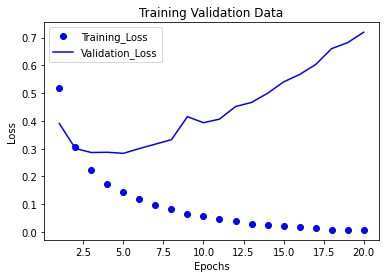

In [10]:
'''
Miguel Zavala
06/12/20
Deep Learning based on the book Deep Learning with Python by Francois Chollet
'''

from keras.datasets import imdb
import numpy as np

(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)
#train_data: a list of lists of word indexes
#train_labels: a list of integers (either 0,1); 0 = bad movie, 1 = good movie

#Preparing the data (and then turning them into tensors):--------
#Decoding the word indexes:
word_index_dict = imdb.get_word_index() #a dictionary where a word_index(int) maps to a word (str)
word_index_items = imdb.get_word_index().items()
currentreview = ""
train_data_i = 0
listOfDecodedReviews = []

reverse_word_index=dict(
    [(value,key) for (key,value) in word_index_dict.items()]
)

for i in range(0,10): 
  decoded_review = ' '.join([reverse_word_index.get(i-3,'') for i in train_data[i]])
  #print(decoded_review)
  listOfDecodedReviews.append(decoded_review)


def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    #print(sequence)
    results[i,sequence]=1 #exactly like results[i][sequence] but faster to just call results[i,sequence]
    #==
    #results[i][sequence] = 1

    #Above is an example of indexing using a list in NumPY: (shown below)
    '''
    Example:
    a = np.array([[1,2],[3,4],[5,6]]) #2D matrix shape = (3 rows,2 columns)

    print(a[[0,1,2], [0,1,0]]) pretty much does: (loops through each index place by place in both lists)
    =
    list( a[0,0]==a[0][0], a[1,1]==a[1][1], a[2,0]==a[2][0] )
  
    '''
  return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

print(y_train)

#------------------------------------------------




#Feeding our data tensors into our network (input data vectors, labels are scalars(0s,1s)):
#Easy setup (vectors,scalars) is to use Fully Connected (Dense) layers and relu activations (max(x,0))
#We will use: Dense(16,activation='relu') which means 16 hidden units

'''
A hidden unit is a dimension in the representation space of the layer
Having 16 hidden units means the weight matrix W will have the shape
(input_dimension,16)

**REMEMBER:
Dense(16,activation='relu') simply means a few tensor operations will occur in the form:
outputlayer = relu(dot(W,inputlayer)+b)

so 16 hidden units means that we will project the input data onto a 16-dimensional reprentation space
and then bias vector b is added and finally relu == max(x,0) is applied to each element in the dimension space

Having more hidden units allows network to learn more-complex representations but makes network
more computationally expensive and can lead to learning unwanted patterns (patterns that will
improve the performance on training data but not test data)

Thus Dense layers need:
 1) How many layers to use
 2) How many hidden units to choose for each layer

'''


#Book chooses to use: 2 intermediate layers with 16 hidden units each
#A third layer is used that will output the scalar prediction regarding the 0 negative or 1 positive review of the movie
#Intermediate layers will use relu as the activiation function
#The final layer will use sigmoid to output a probabilitiy between 0 and 1

#Thus in total we will have 3 layers

'''
Relu: used to zero out negative values
Sigmoid: used to 'squish' arbitrary values into the [0,1] interval to output something
that can be interpreted as a probability 
'''

#Validation Set:----------------------------------------------------------------------------------------
#used to monitor accuracy of the model on data it has never seen before, so we partition the train data apart as different train sets
x_val = x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

#Compiling the model:-------------
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


#The commented version works as well using strings rather than loading from libraries
#model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy']) 
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


#Training the model on the partial set of training data: model.fit... returns a History object:a dictionary about everything that happened during training
#History contains four keys: u'acc',u'loss',u'val_acc',u'val_loss'
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))
history_dict = history.history

#Plotting the Training history using matlab
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
binary_accuracy_values = history_dict['binary_accuracy']
epochs = range(1,len(binary_accuracy_values)+1,+1)

plt.plot(epochs,loss_values,'bo',label='Training_Loss')
plt.plot(epochs,val_loss_values,'b',label='Validation_Loss')
plt.title('Training Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


